In [32]:
import numpy as np
import matplotlib.pyplot as plt

np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [33]:
data = np.loadtxt("/content/drive/My Drive/ex1data1.txt", delimiter=",")
X, y = data[:, 0], data[:, 1]
m = y.size

In [34]:
def plot_data(X, y, x_label, y_label):
  plt.plot(X, y, 'ro', ms=10, mec='k') #ms is marker size
  plt.ylabel(y_label)
  plt.xlabel(x_label)

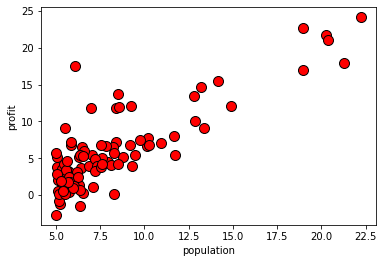

In [35]:
plot_data(X, y, "population", "profit")

In [36]:
# we have a numpy array of theta_1 but we need a theta_0 hence we append an array of ones to X

X = np.stack([np.ones(m), X], axis=1)

image.png

In [37]:
def computeCost(X, y, theta):
  #theta_0 and theta_1 have to be figured out  
  J = 0
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

In [38]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('With theta = [0, 0] \nCost computed = %.2f' % J)
print('Expected cost value (approximately) 32.07\n')

# further testing of the cost function
J = computeCost(X, y, theta=np.array([-1, 2]))
print('With theta = [-1, 2]\nCost computed = %.2f' % J)
print('Expected cost value (approximately) 54.24')

With theta = [0, 0] 
Cost computed = 32.07
Expected cost value (approximately) 32.07

With theta = [-1, 2]
Cost computed = 54.24
Expected cost value (approximately) 54.24


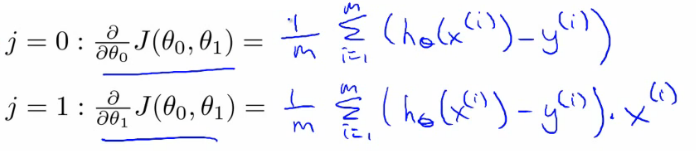

In [39]:
def gradientDescent(X, y, theta, alpha, num_iters):
  theta = theta.copy()
  J_history = []
  for i in range(num_iters):
    h = np.dot(X, theta)
    theta = theta - (alpha/m)*(h-y).dot(X)
    # we use eqn for j=1
    J_history.append(computeCost(X, y, theta))
  
  return theta, J_history

In [40]:
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')

Theta found by gradient descent: -3.6303, 1.1664
Expected theta values (approximately): [-3.6303, 1.1664]


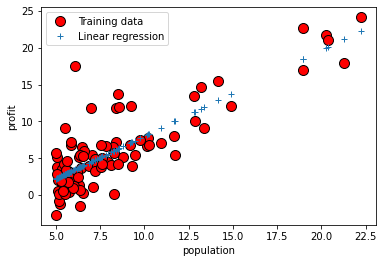

In [50]:
plot_data(X[:, 1], y, "population", "profit")
plt.plot(X[:, 1], np.dot(X, theta), '+')
plt.legend(['Training data', 'Linear regression']);